In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
pwd

'C:\\Users\\rajam\\DS Projects\\DSPython\\Class Exerciese'

In [5]:
#dfQuora = pd.read_csv("train.csv") 

In [6]:
#dfQuora.head(25)

In [7]:
#dfQuora.shape

In [8]:
df = pd.read_csv("TrainQuora.csv")

In [9]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,Label
0,1,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,1
1,2,23,24,How do I read and find my YouTube comments?,How can I see all my Youtube comments?,1,1
2,3,33,34,What does manipulation mean?,What does manipulation means?,1,1
3,4,53,54,What is web application?,What is the web application framework?,0,1
4,5,83,84,When can I expect my Cognizant confirmation mail?,When can I expect Cognizant confirmation mail?,0,1


In [10]:
df.shape

(310, 7)

In [11]:
df.describe()

,id,qid1,qid2,is_duplicate,Label
count,310.000000,310.000000,310.000000,310.000000,310.000000
mean,155.500000,1598.545161,1599.716129,0.341935,0.574194
std,89.633513,1682.084759,1685.661092,0.475125,0.495264
min,1.000000,5.000000,6.000000,0.000000,0.000000
25%,78.250000,219.000000,218.500000,0.000000,0.000000
50%,155.500000,792.000000,793.000000,0.000000,1.000000
75%,232.750000,2621.500000,2622.500000,1.000000,1.000000
max,310.000000,5644.000000,5645.000000,1.000000,1.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
id              310 non-null int64
qid1            310 non-null int64
qid2            310 non-null int64
question1       310 non-null object
question2       310 non-null object
is_duplicate    310 non-null int64
Label           310 non-null int64
dtypes: int64(5), object(2)
memory usage: 17.0+ KB


In [13]:
df['Label'].value_counts()

1    178
0    132
Name: Label, dtype: int64

In [14]:
dfQuora = df[['question1','Label']]

In [15]:
dfQuora.head()

,question1,Label
0,How can I increase the speed of my internet co...,1
1,How do I read and find my YouTube comments?,1
2,What does manipulation mean?,1
3,What is web application?,1
4,When can I expect my Cognizant confirmation mail?,1


In [16]:
dfQuora.groupby('Label').describe()

question1                                                               
          count unique                                                top freq
Label                                                                         
0           132    128                   What is the best book ever made?    2
1           178    177  I was suddenly logged off Gmail. I can't remem...    2

In [17]:
dfQuora['Length'] = dfQuora['question1'].apply(len)

C:\Users\rajam\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [18]:
dfQuora.head()

,question1,Label,Length
0,How can I increase the speed of my internet co...,1,73
1,How do I read and find my YouTube comments?,1,43
2,What does manipulation mean?,1,28
3,What is web application?,1,24
4,When can I expect my Cognizant confirmation mail?,1,49


### Data Visualization

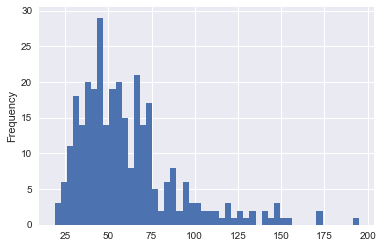

In [19]:
dfQuora['Length'].plot(bins=50,kind='hist')

In [20]:
dfQuora['Length'].describe()

count    310.000000
mean      61.170968
std       29.282352
min       19.000000
25%       42.000000
50%       55.000000
75%       72.000000
max      195.000000
Name: Length, dtype: float64

In [21]:
dfQuora[dfQuora['Length'] == 195]['question1'].iloc[0]

"How headphones work as an Antenna to play FM radio channels on Mobile phones? Why mobile companies doesn't install the same inbuilt Antenna on phones to be able to play FM without the headphones?"

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002B5B1AFD630>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000002B5B2D44EF0>], dtype=object)

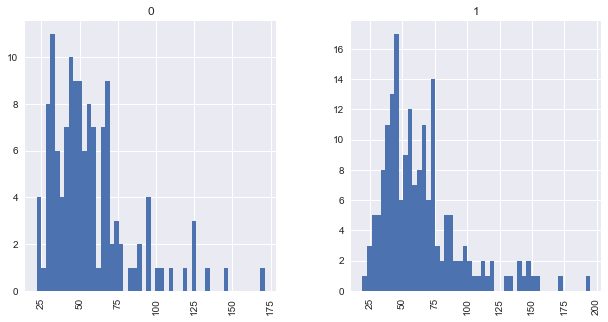

In [22]:
dfQuora.hist(column='Length',by='Label',bins=50,figsize=(10,5))

## Text PreProcessing

In [31]:
import string
import nltk

In [33]:
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> d
    Error loading d: Package 'd' not found in index

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> stopwords
        C:\Users\rajam\AppData\Roaming\nltk_data...
      Unzipping corpora\stopwords.zip.

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


In [34]:
from nltk.corpus import stopwords

In [63]:
def text_process(questions):
    """
    1.Remove punctutation
    2.Remove stopwords
    3.Return a cleaned text
    """
    #Check characters to see if they are in punctution
    cleantext = [char for char in questions if char not in string.punctuation]
    
    #Join the characters again to form the string
    cleantext = ''.join(cleantext)
    
    #Remove stopwords
    return [word for word in cleantext.split() if word.lower() not in stopwords.words('english')]
    

## Train Test Split

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
ques_train,ques_test,label_train,label_test = \
train_test_split(dfQuora['question1'],dfQuora['Label'],test_size = 0.3,random_state=101)

## Vectorization

In [66]:
from sklearn.feature_extraction.text import CountVectorizer

In [79]:
#bow - bag of words
bow_df = CountVectorizer(analyzer=text_process,lowercase=True).fit(dfQuora['question1'])

In [80]:
print('Total no of vocabulary words : ',len(bow_df.vocabulary_))

Total no of vocabulary words :  1103


Lets take a question and get its bag of words counts as a vector

In [81]:
ques = dfQuora['question1'][7]

In [82]:
quesT = bow_df.transform([ques])

In [83]:
print(ques)

What is Java programming? How To Learn Java Programming Language ?


 Vector representation

In [85]:
print(quesT)
quesT.shape

  (0, 156)	2
  (0, 167)	1
  (0, 170)	1
  (0, 224)	1
  (0, 863)	1


(1, 1103)

In [90]:
bow_df.get_feature_names()[170]
#bow_df.get_feature_names()[191]

'Learn'

 Now transform the entire dataframe of questions

In [92]:
questions_bow = bow_df.transform(dfQuora['question1'])

In [93]:
print('Shape of Sparse Matrix ',questions_bow.shape)

Shape of Sparse Matrix  (310, 1103)


#### TF - IDF 

In [98]:
from sklearn.feature_extraction.text import TfidfTransformer

In [100]:
#tfidf_transformer = TfidfTransformer().fit(bow_df)

## Create a Data Pipiline

In [103]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB

In [111]:
pipeline = Pipeline([
                    ('bow', CountVectorizer(analyzer=text_process)), # string to token integer counts
                    #('tfidf',TfidfTransformer()), # integer count to weighted td-idf scores
                    ('classifier',MultinomialNB()) # train on tf-idf vectors with Naive Bayes Classifier
                    ])

In [112]:
pipeline.fit(ques_train,label_train)

Pipeline(steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x000002B5B44ADD08>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocesso...None, vocabulary=None)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [113]:
predictions = pipeline.predict(ques_test)

## Model Evaluation 

In [114]:
from sklearn.metrics import classification_report,confusion_matrix

In [115]:
print(classification_report(label_test,predictions))

             precision    recall  f1-score   support

          0       0.79      0.51      0.62        43
          1       0.68      0.88      0.77        50

avg / total       0.73      0.71      0.70        93



In [116]:
print(confusion_matrix(label_test,predictions))

[[22 21]
 [ 6 44]]
